In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [4]:
#Replacing Geography and genders with dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# ANN 

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
#ANN
classifier = Sequential()

In [10]:
#first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [11]:
#second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [12]:
#output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [13]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

c

In [14]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7776 - val_loss: 0.5237 - val_accuracy: 0.7853
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5063 - accuracy: 0.7957 - val_loss: 0.4971 - val_accuracy: 0.7933
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4820 - accuracy: 0.7983 - val_loss: 0.4773 - val_accuracy: 0.7993
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4637 - accuracy: 0.8031 - val_loss: 0.4629 - val_accuracy: 0.8039
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.8108 - val_loss: 0.4532 - val_accuracy: 0.8114
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4393 - accuracy: 0.8156 - val_loss: 0.4465 - val_accuracy: 0.8164
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8194 - val_loss: 0.4419 - val_accuracy: 0.8133

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.8625 - val_loss: 0.3680 - val_accuracy: 0.8474
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3457 - accuracy: 0.8627 - val_loss: 0.3679 - val_accuracy: 0.8504
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3455 - accuracy: 0.8643 - val_loss: 0.3674 - val_accuracy: 0.8489
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.8632 - val_loss: 0.3671 - val_accuracy: 0.8482
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3449 - accuracy: 0.8638 - val_loss: 0.3670 - val_accuracy: 0.8474
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8653 - val_loss: 0.3665 - val_accuracy: 0.8497
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3439 - accuracy: 0.8645 - val_loss: 0.3660 - val_accuracy:

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 204,  201]], dtype=int64)

In [17]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


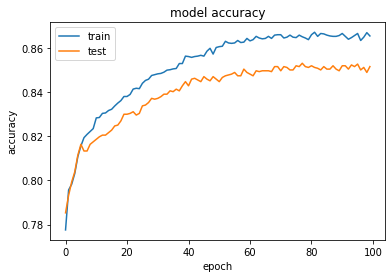

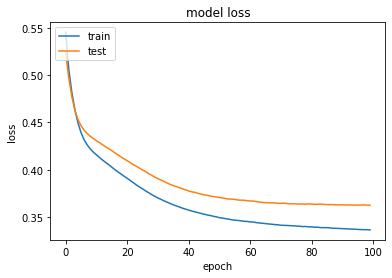

In [19]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()